In [261]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [262]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape, digits.keys()

((1797, 64),
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']))

In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
digits = load_digits()
X, y = load_digits(return_X_y = True) # X는 digits의 data 카테고리로, y는 target 카테고리의 데이터로 이해하면됨.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 7)
print(len(digits.target_names))
len(X_train), len(X_test), len(X_train) + len(X_test)

10


(1617, 180, 1797)

In [264]:
from sklearn.metrics import accuracy_score
neighN = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
neighN.fit(X_train, y_train)
y_pred = neighN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# print(classification_report(y_test, y_pred))
print(f'Accuracy : {accuracy*100}')

Accuracy : 98.88888888888889


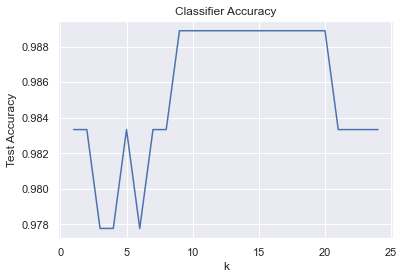

In [265]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Classifier Accuracy")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

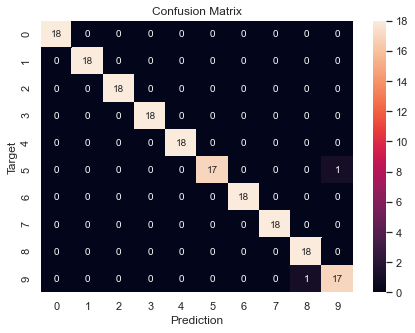

In [266]:
from sklearn.metrics import confusion_matrix

y_pred = neighN.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7, 5))
sns.heatmap(cf, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [267]:
new_data = np.array([x], dtype = np.float64)
new_data

array([[ 6.,  5.,  6.,  8.,  2.,  8.,  8.,  1.,  7.,  9.,  5.,  8., 11.,
         8.,  1., 10., 13.,  1.,  2.,  0.,  1.,  6.,  4.,  5.,  9.,  6.,
         2., 14.,  8., 10., 12.,  5.,  2.,  0.,  1., 12., 13.,  7.,  2.,
         2.,  1.,  3.,  5., 14.,  7.,  5., 12., 14.,  8.,  0.,  6.,  0.,
        13.,  7.,  4.,  6., 10., 14.,  8.,  8.,  4., 14.,  6., 10.]])

In [268]:
import random
np.random.seed(57)
x = [np.random.randint(0, 15) for _ in range(64)]
type(X[0][0])
neighN.predict(new_data)

array([8])